# Análise Exploratória dos Dados dos Manuais de Procedimentos Operacionais (MPO) do SIN - Sistema Interligado Nacional

In [3]:
import pandas as pd
from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt

## 1. Importando os dados

In [4]:
PLANILHA_MPO = '../../Data/Raw/mpo_fragmentos.xlsx'

# Algumas colunas tem seus tipos configurados diretamente na leitura do arquico Excel. Isso evita problemas posteriores de conversões de tipo
df_mpo = pd.read_excel(PLANILHA_MPO, converters={'ID': int, 'Level':str, 'MpoIdentificador':str, 'MpoAreaEletrica':str, 'MpoCentro':str, 'MpoLigadoDesligado':str, 'Texto':str, 'Título':str})

## 2. Verificando os dados

### 2.1 Formatos

In [5]:
print('Formato dos dados:', df_mpo.shape, '\n')
print('Colunas:', df_mpo.columns.tolist())
df_mpo.head(15)

Formato dos dados: (5456, 32) 

Colunas: ['ID', 'Level', 'MpoEquipamentos', 'StatusDocumento', 'MpoIdentificador', 'Tipo de Conteúdo', 'MpoEquipamentos:mrid', 'MpoAreaEletrica', 'MpoCentro', 'MpoLigadoDesligado', 'Hierarquia', 'Identificador exclusivo', 'MpoEquipamentos:agenteoperador', 'MpoEquipamentos:agenteproprietario', 'MpoEquipamentos:centro', 'MpoEquipamentos:chave', 'MpoEquipamentos:codagenteoperador', 'MpoEquipamentos:codagenteproprietario', 'MpoEquipamentos:codigoareaeletrica', 'MpoEquipamentos:codigoons', 'MpoEquipamentos:familia', 'MpoEquipamentos:nomegerlim', 'MpoEquipamentos:tipo', 'MpoLocalizacaoTaxonomia', 'MpoSubmodulo', 'MpoTema', 'MpoTipoDocumento', 'Nome do Documento', 'Texto', 'Título', 'Tipo de Item', 'Caminho']


,ID,Level,MpoEquipamentos,StatusDocumento,MpoIdentificador,Tipo de Conteúdo,MpoEquipamentos:mrid,MpoAreaEletrica,MpoCentro,MpoLigadoDesligado,...,MpoEquipamentos:tipo,MpoLocalizacaoTaxonomia,MpoSubmodulo,MpoTema,MpoTipoDocumento,Nome do Documento,Texto,Título,Tipo de Item,Caminho
0,161279,1,NaN,Vigente,IO-PM.6MD,ecm-fragment,NaN,6MD,CNOS,Não definido,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><p style=""margin-top:0pt; margin-bottom:6...",OBJETIVO,Item,sites/buscafragmentada/Lists/ecmcontents
1,161280,2,NaN,Vigente,IO-PM.6MD,ecm-fragment,NaN,6MD,CNOS,Não definido,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><p style=""margin-top:6pt; margin-left:34p...",CONSIDERAÇÕES GERAIS,Item,sites/buscafragmentada/Lists/ecmcontents
2,161281,3,NaN,Vigente,IO-PM.6MD,ecm-section,NaN,6MD,CNOS,Não definido,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><p style=""margin-top:0pt; margin-bottom:0...",PREPARAÇÃO PARA MANOBRAS EM LINHAS DE TRANSMISSÃO,Item,sites/buscafragmentada/Lists/ecmcontents
3,161282,3.1,NaN,Vigente,IO-PM.6MD,ecm-section,NaN,6MD,CNOS,Não definido,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><p style=""margin-top:0pt; margin-bottom:0...",LT 230 kV Coletora Porto Velho / Porto Velho C...,Item,sites/buscafragmentada/Lists/ecmcontents
4,161283,3.1.1,LT 230 kV Coletora Porto Velho / Porto Velho C...,Vigente,IO-PM.6MD,ecm-fragment,a9a06eca-6f49-4a3c-a804-feac9fb96942;#15054;#4...,6MD,CNOS,Desligar,...,LTR;#15054;#LTR;#15055,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><h4 style=""margin-top:12pt; margin-left:4...",Desenergização da LT 230 kV Coletora Porto Vel...,Item,sites/buscafragmentada/Lists/ecmcontents
5,161284,3.1.2,LT 230 kV Coletora Porto Velho / Porto Velho C...,Vigente,IO-PM.6MD,ecm-fragment,a9a06eca-6f49-4a3c-a804-feac9fb96942;#15054;#4...,6MD,CNOS,Ligar,...,LTR;#15054;#LTR;#15055,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><h4 style=""margin-top:12pt; margin-left:3...",Energização da LT 230 kV Coletora Porto Velho ...,Item,sites/buscafragmentada/Lists/ecmcontents
6,161285,3.1.3,NaN,Vigente,IO-PM.6MD,ecm-fragment,NaN,6MD,CNOS,Ligar,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><table style=""width:480.6pt; margin-left:...",Energização dos dois circuitos da LT 230 kV Co...,Item,sites/buscafragmentada/Lists/ecmcontents
7,161286,3.2,NaN,Vigente,IO-PM.6MD,ecm-section,NaN,6MD,CNOS,Não definido,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><p style=""margin-top:0pt; margin-bottom:0...",LT 500 kV Santo Antônio Margem Direita / Colet...,Item,sites/buscafragmentada/Lists/ecmcontents
8,161287,3.2.1,NaN,Vigente,IO-PM.6MD,ecm-fragment,NaN,6MD,CNOS,Desligar,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><table style=""width:484.05pt; margin-left...",Desenergização da LT 500 kV Santo Antônio Marg...,Item,sites/buscafragmentada/Lists/ecmcontents
9,161288,3.2.2,NaN,Vigente,IO-PM.6MD,ecm-fragment,NaN,6MD,CNOS,Ligar,...,NaN,3.1.3.1.,10.21 - Preparação pa

### 2.2 Qualidade em relação a completude dos dados

In [6]:
df_mpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   ID                                     5456 non-null   int64 
 1   Level                                  5456 non-null   object
 2   MpoEquipamentos                        1491 non-null   object
 3   StatusDocumento                        5456 non-null   object
 4   MpoIdentificador                       5456 non-null   object
 5   Tipo de Conteúdo                       5456 non-null   object
 6   MpoEquipamentos:mrid                   1491 non-null   object
 7   MpoAreaEletrica                        5456 non-null   object
 8   MpoCentro                              5456 non-null   object
 9   MpoLigadoDesligado                     5456 non-null   object
 10  Hierarquia                             5456 non-null   object
 11  Identificador exc

### Podemos ver que do total de fragmentos, 5456, somente 1491 apresentam informações diretamente relacionadas a equipamentos (Características MPOEquipamentos: *). Como o interesse do estudo é a classificação dos textos que efetivamente indicam manobras em equipamentos, pode ser um indicativo de diminuição de registros.

### 2.3 Valores distintos - Geral

In [7]:
colunas_interesse = ['MpoIdentificador','StatusDocumento', 'MpoTema', 'MpoAreaEletrica', 'MpoCentro', 'MpoLigadoDesligado', 'MpoTema', 'MpoTipoDocumento']

for ci in colunas_interesse:
    print(f'Coluna: {ci} | Distintos: {df_mpo[ci].nunique()} | Valores: {df_mpo[ci].unique()}\n')
    

Coluna: MpoIdentificador | Distintos: 30 | Valores: ['IO-PM.6MD' 'IO-PM.8XG' 'IO-PM.CO.2MS' 'IO-PM.CO.5GB' 'IO-PM.CO.5MT'
 'IO-PM.N.2TR' 'IO-PM.N.5MM' 'IO-PM.N.5PA' 'IO-PM.N.5RR' 'IO-PM.N.ACRO'
 'IO-PM.NE.2NO' 'IO-PM.NE.2OE' 'IO-PM.NE.2SO' 'IO-PM.NE.5CT'
 'IO-PM.NE.5LE' 'IO-PM.NE.5MA' 'IO-PM.NE.5SL' 'IO-PM.NNE' 'IO-PM.NSE'
 'IO-PM.S.2PR' 'IO-PM.S.2SC' 'IO-PM.S.5SU' 'IO-PM.SE.3RG' 'IO-PM.SE.3SP'
 'IO-PM.SE.4SP' 'IO-PM.SE.5MG' 'IO-PM.SE.5RJ' 'IO-PM.SE.5SE' 'IO-PM.SENE'
 'IO-PM.SSE']

Coluna: StatusDocumento | Distintos: 1 | Valores: ['Vigente']

Coluna: MpoTema | Distintos: 14 | Valores: ['Preparação para Manobras' '3.1.3. Preparação para Manobras'
 'Instruções da Região Norte - Área 230 kV Tramo Oeste'
 'Instruções da Região Norte - Área 500/230 kV Pará'
 'Instruções da Região NE - Área Norte'
 'Instruções da Região NE - Área Oeste'
 'Instruções da Região NE - Área Sudoeste'
 'Instruções da Região NE - Geral' 'Interligação entre Regiões'
 'Instruções da Região Sul'
 'Instruções da Regiã

### Apesar de termos 5456 fragmentos estamos falando de 30 Instruções Operativas de documentos vigentes e todos relacionados ao tópico preparação de manobra. Essas IOs tratam somente de ligar e desligar os equipamentos e a cobertura dos mesmo paerce ser do Brasil inteiro dada a presença de todos os centros de operação do ONS. Fato corroborado por todas as regiões geográficas estarem presentes.

<AxesSubplot:title={'center':'Centros por Fragmentos'}>

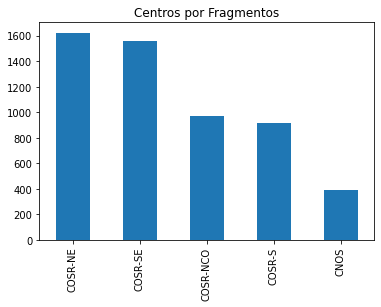

In [75]:
df_mpo['MpoCentro'].value_counts()[:5].plot(kind='bar', title='Centros por Fragmentos')

<AxesSubplot:title={'center':'Top 10 IOs com mais fragmentos'}>

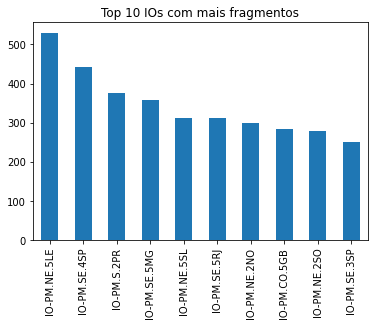

In [76]:
df_mpo['MpoIdentificador'].value_counts()[:10].plot(kind='bar', title='Top 10 IOs com mais fragmentos')

In [ ]:
### 2.4 Valores distintos - Equipamentos

In [6]:
colunas_interesse_eqp = ['MpoEquipamentos:agenteoperador', 'MpoEquipamentos:agenteproprietario', 'MpoEquipamentos:centro', 'MpoEquipamentos:chave', 'MpoEquipamentos:codagenteoperador', 'MpoEquipamentos:codagenteproprietario', 'MpoEquipamentos:codigoareaeletrica', 'MpoEquipamentos:codigoons', 'MpoEquipamentos:familia', 'MpoEquipamentos:nomegerlim', 'MpoEquipamentos:tipo', 'MpoLocalizacaoTaxonomia']

for ci in colunas_interesse_eqp:
    print(f'Coluna: {ci} | Distintos: {df_mpo[ci].nunique()}\n')

Coluna: MpoEquipamentos:agenteoperador | Distintos: 751

Coluna: MpoEquipamentos:agenteproprietario | Distintos: 751

Coluna: MpoEquipamentos:centro | Distintos: 751

Coluna: MpoEquipamentos:chave | Distintos: 751

Coluna: MpoEquipamentos:codagenteoperador | Distintos: 751

Coluna: MpoEquipamentos:codagenteproprietario | Distintos: 751

Coluna: MpoEquipamentos:codigoareaeletrica | Distintos: 751

Coluna: MpoEquipamentos:codigoons | Distintos: 751

Coluna: MpoEquipamentos:familia | Distintos: 751

Coluna: MpoEquipamentos:nomegerlim | Distintos: 751

Coluna: MpoEquipamentos:tipo | Distintos: 751

Coluna: MpoLocalizacaoTaxonomia | Distintos: 6



### Tirando a taxonomia podemos observar que de as IOs abrangem no mínimo 751 equipamentos.

### 2.5 Verificando o formato dos textos

In [7]:
df_mpo['Texto'].iloc[1]

'<div><p style="margin-top:6pt; margin-left:34pt; margin-bottom:3pt; text-indent:-34pt; text-align:justify; font-size:11pt"><span style="font-family:Calibri">2.1.</span><span style="font:7pt \'Times New Roman\'">&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0; </span><span><span style="font-family:Calibri">Os procedimentos contidos nesta instrução de operação são aqueles necessários para realização de manobras de desenergização e energização somente de linhas de transmissão e equipamentos da Rede de Operação, considerando em operação as demais linhas de transmissão e equipamentos das subestações envolvidas na manobra.</span></span></p><p style="margin-top:0pt; margin-left:28.35pt; margin-bottom:6pt; text-align:justify; widows:0; orphans:0; font-size:11pt"><span style="font-family:Calibri">As manobras que consideram equipamento(s) ou linha(s) de transmissão desligado(s) ou restrições adicionais no sistema devem estar especificadas nos itens da respectiva manobra.</span

In [8]:
display(HTML('<html><body>'+df_mpo['Texto'].iloc[1]+'<body/><html/>'))

In [9]:
df_mpo['Texto'].iloc[28]

'<div><table style="width:484.05pt; margin-left:3.5pt; border:2.25pt solid #ffffff; border-collapse:collapse"><thead><tr style="height:62.55pt"><td style="width:15.55pt; height:62.55pt; writing-mode:tb-rl; border-right:2.25pt solid #ffffff; border-bottom:2.25pt solid #ffffff; padding:1.72pt; background-color:#4f8ad8"><div style="height:62.55pt; writing-mode:tb-rl;transform:rotate(180deg);margin:0 auto;"><p style="margin-top:0pt; margin-bottom:0pt; text-align:center; widows:0; orphans:0; font-size:11pt"><span style="font-family:Calibri; font-weight:bold; color:#ffffff">Passo</span></p></div></td><td style="width:14.25pt; height:62.55pt; writing-mode:tb-rl; border-right:2.25pt solid #ffffff; border-left:2.25pt solid #ffffff; border-bottom:2.25pt solid #ffffff; padding-right:2.38pt; padding-left:2.38pt; background-color:#4f8ad8"><div style="height:62.55pt; writing-mode:tb-rl;transform:rotate(180deg);margin:0 auto;"><p style="margin-top:0pt; margin-bottom:0pt; text-align:center; widows:0; 

In [10]:
display(HTML('<html><body>'+df_mpo['Texto'].iloc[28]+'<body/><html/>'))

In [11]:
df_mpo['Texto'].iloc[5]

'<div><h4 style="margin-top:12pt; margin-left:35.45pt; margin-bottom:6pt; text-indent:-35.45pt; text-align:justify; page-break-after:avoid; font-size:11pt"><span style="font-family:Calibri; text-transform:uppercase">3.1.2.1.</span><span style="font:7pt \'Times New Roman\'"> </span><span></span><span></span><span></span><span><span style="font-family:Calibri; text-transform:uppercase">Energização da LT 230 kV Coletora Porto Velho / Porto Velho (C1 ou C2) a partir da SE Porto Velho (sentido normal)</span></span></h4><table style="width:480.6pt; margin-left:6.85pt; border:2.25pt solid #ffffff; border-collapse:collapse"><thead><tr style="height:65.75pt"><td style="width:15.55pt; height:65.75pt; writing-mode:tb-rl; border-right:2.25pt solid #ffffff; border-bottom:2.25pt solid #ffffff; padding:1.72pt; background-color:#4f8ad8"><div style="height:65.75pt; writing-mode:tb-rl;transform:rotate(180deg);margin:0 auto;"><p style="margin-top:0pt; margin-bottom:0pt; text-align:center; widows:0; orpha

In [12]:
display(HTML('<html><body>'+df_mpo['Texto'].iloc[5]+'<body/><html/>'))

Passo,Coordenação,Controle,Comando/ Execução,Procedimento,Objetivo / Item de Controle
1,COSR-NCO,COSR-NCO,Eletronorte (OEORR),"Energizar a LT 230 kV Coletora Porto Velho / Porto Velho, pelo terminal da SE Porto Velho.",SE Porto Velho ≤ 241 kV.
2,COSR-NCO,COSR-NCO,Eletronorte (OEORR),"Fechar o terminal da LT 230 kV Coletora Porto Velho / Porto Velho, na SE Coletora Porto Velho.",V ≤ 23 kV.
Passo,Coordenação,Controle,Comando/ Execução,Procedimento,Objetivo / Item de Controle
1,COSR-NCO,COSR-NCO,Eletronorte (OEORR),"Energizar a LT 230 kV Coletora Porto Velho / Porto Velho, pelo terminal da SE Coletora Porto Velho.",SE Porto Velho ≤ 241 kV.
2,COSR-NCO,COSR-NCO,Eletronorte (OEORR),"Fechar o terminal da LT 230 kV Coletora Porto Velho / Porto Velho, na SE Porto Velho.",V ≤ 23 kV.


### Podemos verificar que os textos estão codificados com a formatação HTML. As tags terão que ser retiradas para que os comandos de manobra possa ser mais facilmente tratados.

## 3 Gerando parquet para uso na preparação dos dados

In [13]:
df_mpo_selecionados = df_mpo.filter(['ID', 'Level', 'MpoIdentificador', 'MpoAreaEletrica', 'MpoCentro', 'MpoLigadoDesligado', 'Texto', 'Título'], axis=1)

In [14]:
PARQUET_MPO_SELECIONADOS = '../../Data/Processed/mpo_selecionados.parquet'

df_mpo_selecionados.to_parquet(PARQUET_MPO_SELECIONADOS)